In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [6]:
iris=load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
t=pd.DataFrame(iris.target,columns=["Target"])

In [8]:
df["target"]=t

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


<Axes: xlabel='sepal length (cm)', ylabel='Count'>

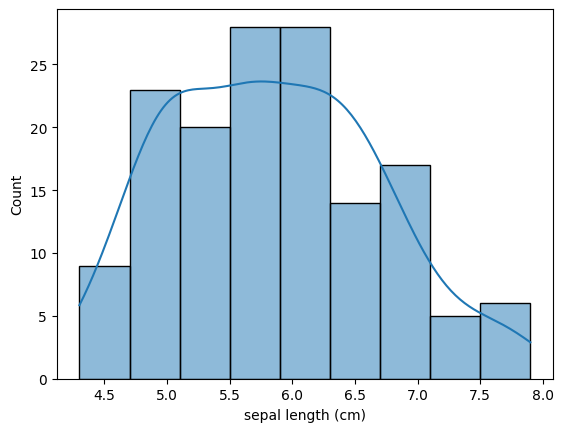

In [12]:
sns.histplot(data=df,x="sepal length (cm)",kde=True)

<Axes: xlabel='petal length (cm)', ylabel='Count'>

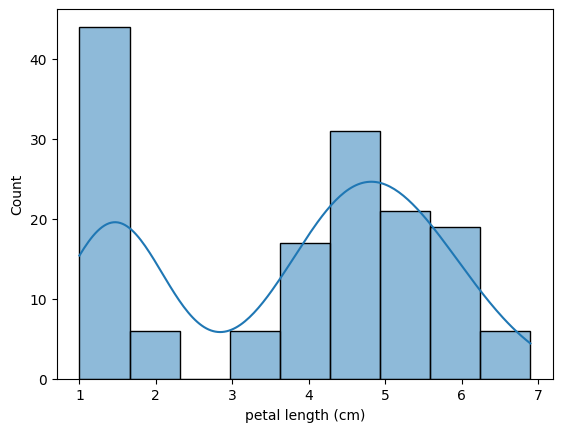

In [13]:
sns.histplot(data=df,x="petal length (cm)",kde=True)


<Axes: xlabel='sepal width (cm)', ylabel='Count'>

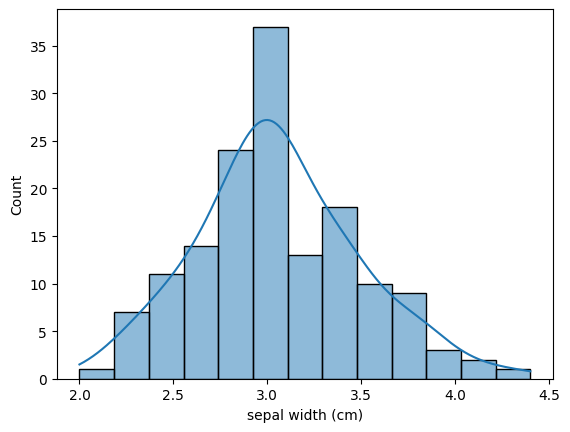

In [14]:
sns.histplot(data=df,x="sepal width (cm)",kde=True)


<Axes: xlabel='petal length (cm)', ylabel='Count'>

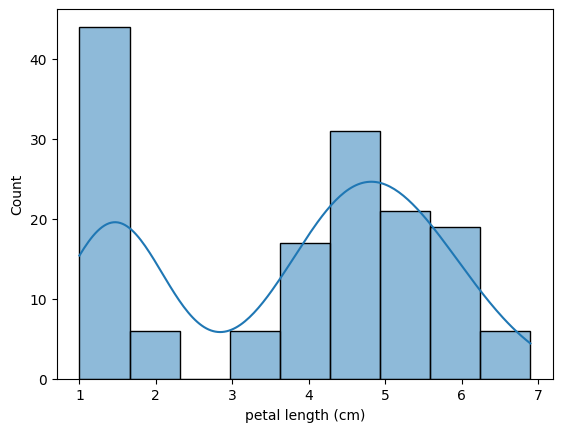

In [15]:
sns.histplot(data=df,x="petal length (cm)",kde=True)


<Axes: xlabel='target', ylabel='Count'>

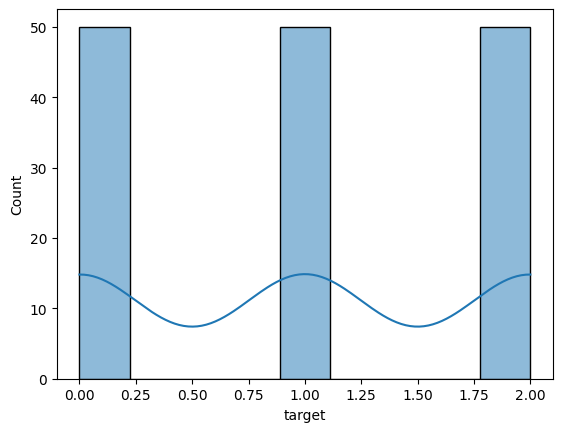

In [16]:
sns.histplot(data=df,x="target",kde=True)

<Axes: xlabel='target', ylabel='petal length (cm)'>

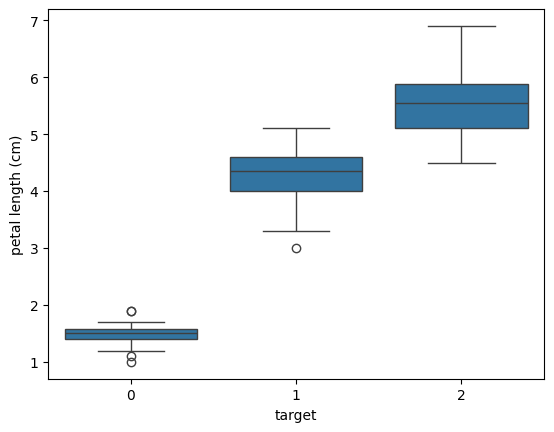

In [17]:
sns.boxplot(data=df,x="target",y="petal length (cm)")

<Axes: xlabel='target', ylabel='sepal length (cm)'>

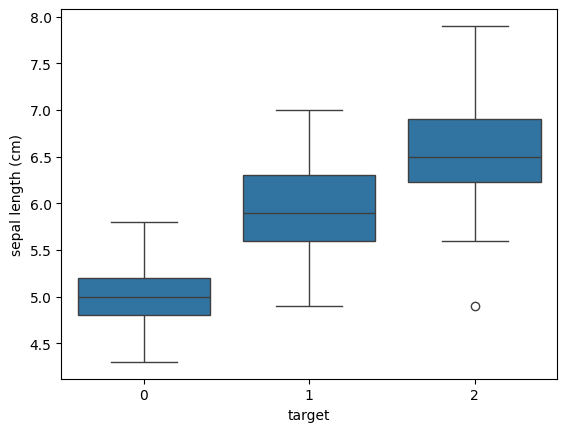

In [18]:
sns.boxplot(data=df,x="target",y="sepal length (cm)")

<Axes: xlabel='target', ylabel='sepal width (cm)'>

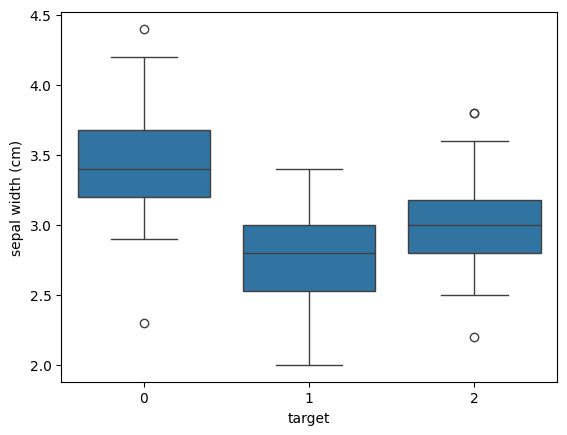

In [19]:
sns.boxplot(data=df,x="target",y="sepal width (cm)")

<Axes: xlabel='target', ylabel='petal width (cm)'>

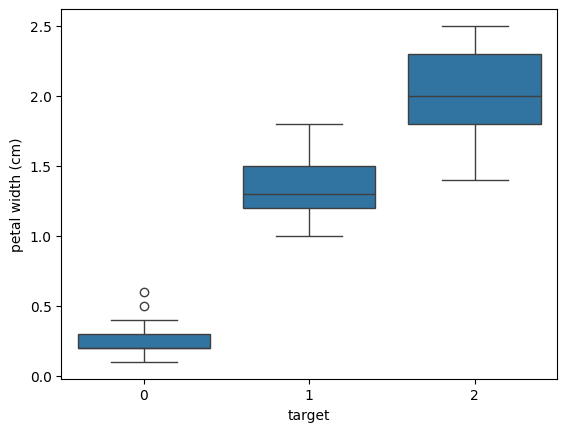

In [20]:
sns.boxplot(data=df,x="target",y="petal width (cm)")

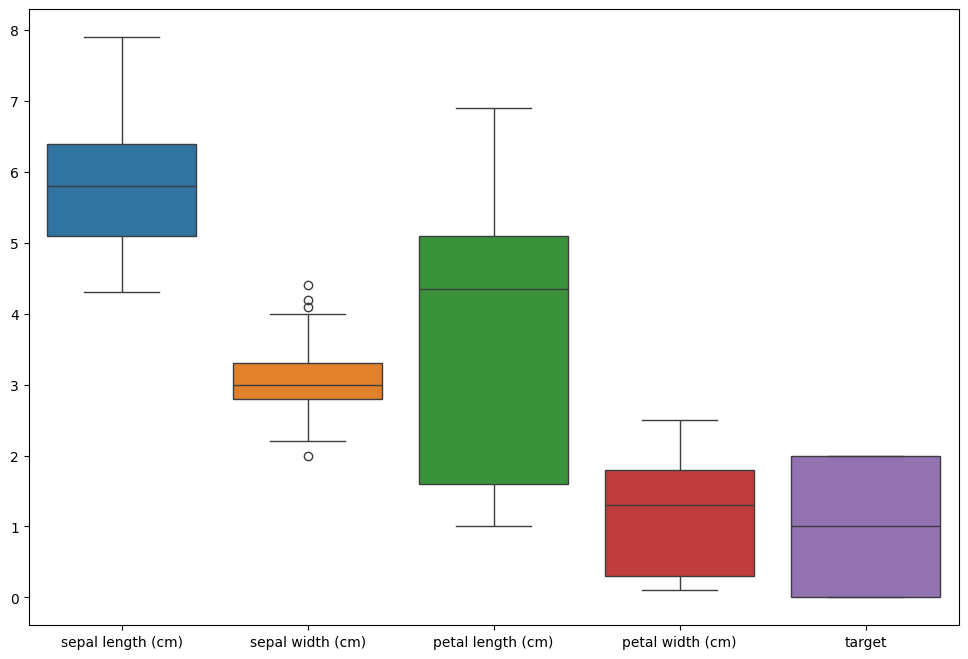

In [21]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df)
plt.show()

In [22]:
from matplotlib.cbook import boxplot_stats
stats=boxplot_stats(df["sepal width (cm)"])
stats

[{'mean': 3.0573333333333337,
  'iqr': 0.5,
  'cilo': 2.9359050183971735,
  'cihi': 3.0640949816028265,
  'whishi': 4.0,
  'whislo': 2.2,
  'fliers': array([2. , 4.4, 4.1, 4.2]),
  'q1': 2.8,
  'med': 3.0,
  'q3': 3.3}]

In [23]:
stats[0].get("fliers")

array([2. , 4.4, 4.1, 4.2])

In [32]:
def detect(d):
    q1=d.quantile(0.25)
    q3=d.quantile(0.75)
    iqr=q3-q1
    lb=q1-1.5*iqr
    up=q3+1.5*iqr
    quantliers=d[(d<lb)|(d>up)]
    return quantliers




In [33]:
p=detect(df["sepal width (cm)"])
p

15    4.4
32    4.1
33    4.2
60    2.0
Name: sepal width (cm), dtype: float64